# <center>Challenge 0<center>

<p>Team Name: Regular
<p>Student Names: Alameen Adeku, Harper Laskie, Sirjana Acharya

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PART I

## Prepare Data

<b>A. Create a data set D with 100 data points with the following attributes (features) as such:</b><br>
seed = 0<br>
a1 is from a normal distribution N(mean=20,var=4)<br>
a2 is from a uniform distribution U(min=14,max=26)<br>

In [2]:
np.random.seed(0)

a1 = np.random.normal(loc=20,scale=2, size = 100)
a2 = np.random.uniform(low=14, high=26, size=100)

D = pd.DataFrame({
    'a1': a1, 'a2': a2
})
print(D)

           a1         a2
0   23.528105  19.086261
1   20.800314  21.276719
2   21.957476  14.230318
3   24.481786  17.618898
4   23.735116  21.922082
..        ...        ...
95  21.413146  23.972581
96  20.021000  21.547782
97  23.571741  24.471808
98  20.253824  17.282504
99  20.803979  23.576562

[100 rows x 2 columns]


x1 = 2*a1<br>
x2 = normal distribution N(mean=40,var=4)<br>
Pr(x1,x2,target) = {(x1, x2, 'P')}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,x1,20), shift in x1-dimension by 20 units towards right, data objects with class negative, where
Nr(x1,x2,target) = {(x1_shifted, x2, 'N')}<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>

In [4]:
pi = math.pi
def rotate_points(df, angle):
    x1_new, x2_new = [], []
    for _, row in df.iterrows():
        x1_new.append(row['x1']*math.cos(angle) - row['x2']*math.sin(angle))
        x2_new.append(row['x1']*math.sin(angle) + row['x2']*math.cos(angle))
    
    df = pd.DataFrame({'x1':x1_new, 'x2':x2_new})
    return df

x1 = [i*2 for i in a1]
x2 = np.random.normal(loc=40,scale=2, size = 100)
Pr_target = ['P' for i in range(len(x1))]

Pr = pd.DataFrame({'x1':x1, 'x2':x2, 'target': Pr_target})
# 45 degrees = pi/4 radians
P = rotate_points(Pr,pi/4)
P['target'] = Pr_target
print(P)

          x1         x2 target
0   5.912139  60.635391      P
1   1.684707  57.147466      P
2   2.070033  60.035088      P
3   6.502399  62.742550      P
4   8.154073  58.978973      P
..       ...        ...    ...
95  3.593740  56.971784      P
96 -0.366906  56.994846      P
97  6.455693  60.215258      P
98 -0.831285  58.117750      P
99  1.489785  57.352752      P

[100 rows x 3 columns]


In [5]:
x1_shifted = [i+20 for i in x1]
print('Original x1:', x1)
print('Shifted x1:', x1_shifted)
Nr_target = ['N' for i in range(len(x1))]
Nr = pd.DataFrame({'x1':x1_shifted, 'x2':x2 ,'target': Nr_target})
N = rotate_points(Nr,pi/4)
N['target'] = Nr_target
print('N DataFrame:\n ', N)

Original x1: [47.05620938387066, 41.600628833468896, 43.91495193642296, 48.963572796805835, 47.47023196059987, 36.09088848049436, 43.80035367010236, 39.39457116680921, 39.58712459282577, 41.64239400775349, 40.576174284643514, 45.8170940278519, 43.04415090058797, 40.48670006597131, 41.7754529309817, 41.334697309497066, 45.97631629263042, 39.179366944936795, 41.252270806603605, 36.5836170427931, 29.788040736663685, 42.61447438176144, 43.457744795438025, 37.03133991837423, 49.07901849595043, 34.18253730160494, 40.18303406920578, 39.251264599896665, 46.13111685743383, 45.87743507960114, 40.61978970278766, 41.5126500784087, 36.448857009479546, 32.07681412710429, 38.60835140269539, 40.62539587641592, 44.921162722910886, 44.80951939513764, 38.45069273036819, 38.790788997698655, 35.80578813973163, 34.3199282512841, 33.17491923749995, 47.80310158092716, 37.96139127299339, 38.247702793555256, 34.98881855980029, 43.10996142332764, 33.5444086097682, 39.14903887914412, 36.4181337552253, 41.54760999

### Merge Data

Merge P and N into a single set PN. 

In [6]:
PN = pd.concat([P,N], ignore_index=True)
print(PN)

            x1         x2 target
0     5.912139  60.635391      P
1     1.684707  57.147466      P
2     2.070033  60.035088      P
3     6.502399  62.742550      P
4     8.154073  58.978973      P
..         ...        ...    ...
195  17.735875  71.113920      N
196  13.775230  71.136981      N
197  20.597829  74.357394      N
198  13.310851  72.259886      N
199  15.631921  71.494888      N

[200 rows x 3 columns]


# PART II

## Visualize Data
The axis scale should be the same. The class-P and -N data points will in red-circle and blue-triangle, respectively.

Plot Pr and P in the same figure on a separate sub-plots of 1 by 2:

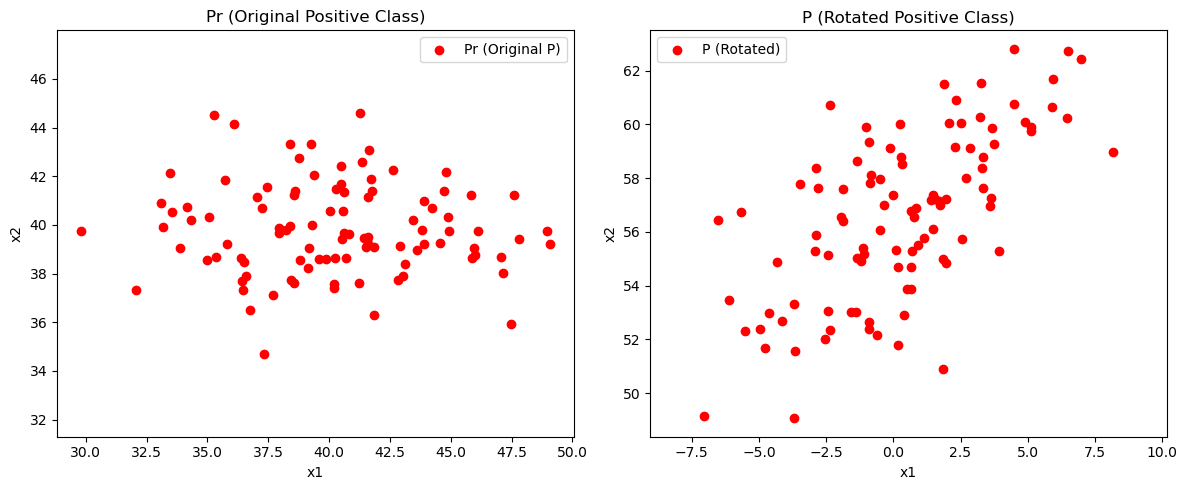

In [7]:
# Create subplots for Pr and P
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Pr
axes[0].scatter(Pr['x1'], Pr['x2'], color='red', marker='o', label='Pr (Original P)')
axes[0].set_title("Pr (Original Positive Class)")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].axis('equal')
axes[0].legend()

# Plot P (rotated)
axes[1].scatter(P['x1'], P['x2'], color='red', marker='o', label='P (Rotated)')
axes[1].set_title("P (Rotated Positive Class)")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")
axes[1].axis('equal')
axes[1].legend()

plt.tight_layout()
plt.show()

Plot Nr and N in the same figure on a separate sub-plots of 1 by 2:

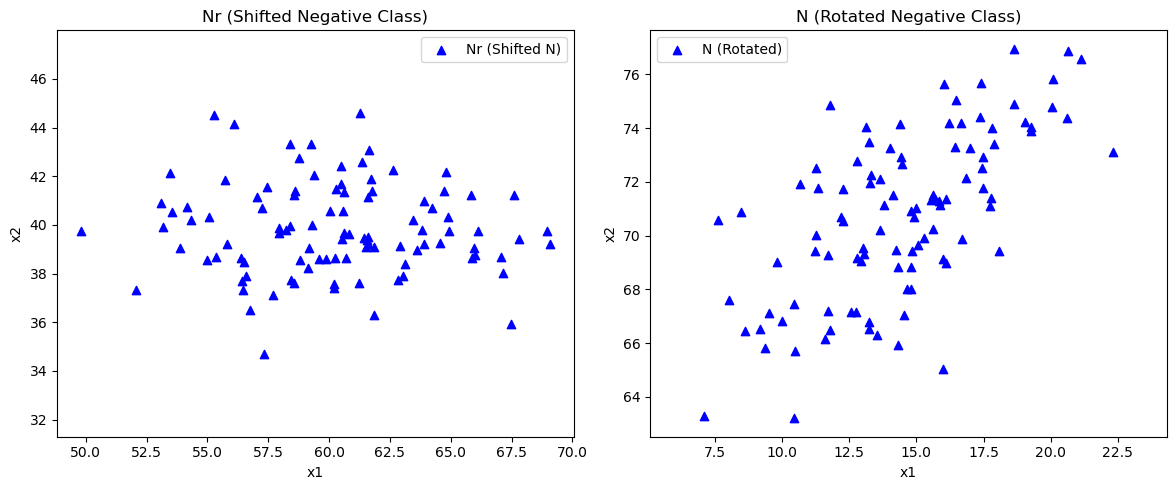

In [8]:
# Create subplots for Nr and N
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Nr
axes[0].scatter(Nr['x1'], Nr['x2'], color='blue', marker='^', label='Nr (Shifted N)')
axes[0].set_title("Nr (Shifted Negative Class)")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].axis('equal')
axes[0].legend()

# Plot N (rotated)
axes[1].scatter(N['x1'], N['x2'], color='blue', marker='^', label='N (Rotated)')
axes[1].set_title("N (Rotated Negative Class)")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")
axes[1].axis('equal')
axes[1].legend()

plt.tight_layout()
plt.show()

Plot {PN}:

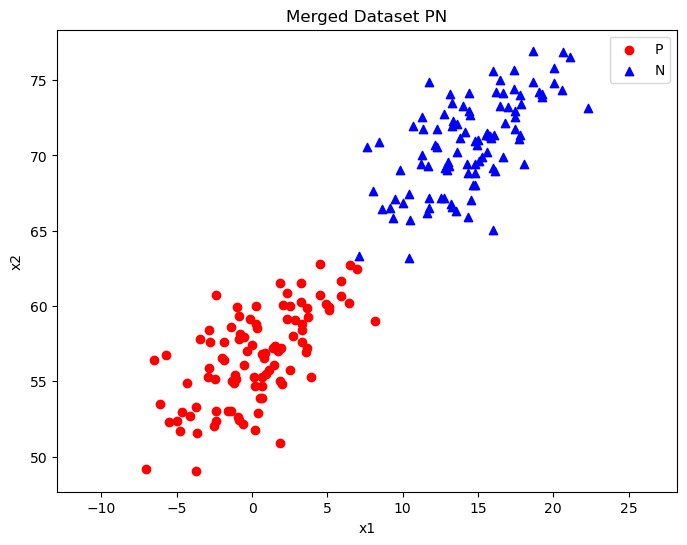

In [9]:
# Plot merged dataset PN
plt.figure(figsize=(8,6))

# Plot P points
plt.scatter(PN[PN['target']=='P']['x1'], 
            PN[PN['target']=='P']['x2'], 
            color='red', marker='o', label='P')

# Plot N points
plt.scatter(PN[PN['target']=='N']['x1'], 
            PN[PN['target']=='N']['x2'], 
            color='blue', marker='^', label='N')

plt.title("Merged Dataset PN")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.legend()
plt.show()

# PART III

## Simple Classifier

Classifier SimpleClassifier:
Given data D(x1, x2, target),<br>
If x1 + x2 > median, then predicted class:<br>
...    <b>N</b><br>
Else<br>
...    <b>P</b>

Obtain predicted class labels of the dataset PN using SimpleClassifier:

In [21]:
# compute median
median_val = (PN['x1'] + PN['x2']).median()

# simpleClassifier
PN['predicted_Target'] = np.where(
    PN['x1'] + PN['x2'] > median_val,
    'N',
    'P'
)

Print output Y(x1,x2,True_Target, Predicted_Target)

In [22]:
Y = PN[['x1', 'x2', 'target', 'predicted_Target']]
print(Y)

            x1         x2 target predicted_Target
0     5.912139  60.635391      P                P
1     1.684707  57.147466      P                P
2     2.070033  60.035088      P                P
3     6.502399  62.742550      P                P
4     8.154073  58.978973      P                P
..         ...        ...    ...              ...
195  17.735875  71.113920      N                N
196  13.775230  71.136981      N                N
197  20.597829  74.357394      N                N
198  13.310851  72.259886      N                N
199  15.631921  71.494888      N                N

[200 rows x 4 columns]


Plot output Y. Use the same marker shape. Predicted Target colors: P in Red and N in blue. Zoom in to show miss classified data points as needed.

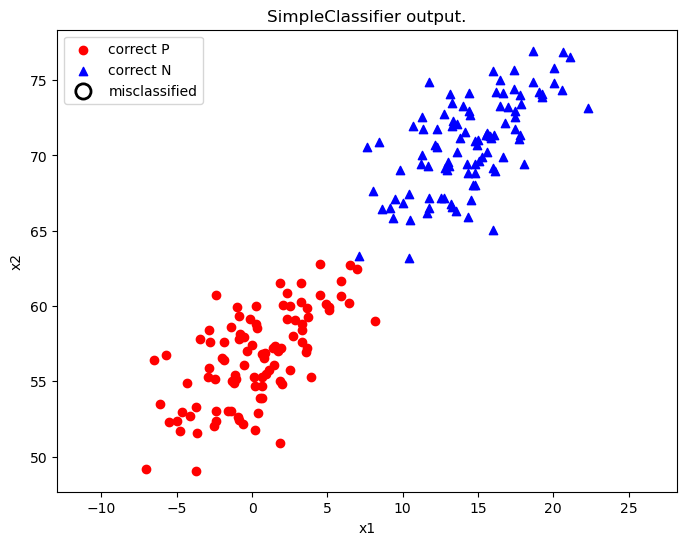

In [23]:
plt.figure(figsize=(8, 6))

# classifications
correct = Y[Y['target'] == Y['predicted_Target']]
plt.scatter(
    correct[correct['predicted_Target'] == 'P']['x1'],
    correct[correct['predicted_Target'] == 'P']['x2'],
    color='red', marker='o', label='correct P'
)

plt.scatter(
    correct[correct['predicted_Target'] == 'N']['x1'],
    correct[correct['predicted_Target'] == 'N']['x2'],
    color='blue', marker='^', label='correct N'
)

# misclassified
misclassified = Y[Y['target'] != Y['predicted_Target']]
plt.scatter(
    misclassified['x1'],
    misclassified['x2'],
    facecolors='none', edgecolors='black',
    s=120, linewidth=2, label='misclassified'
)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("SimpleClassifier output.")
plt.axis('equal')
plt.legend()
plt.show()

Obtain the Confusion Matrix and print:

In [24]:
TP = np.sum((Y['target'] == 'P') & (Y['predicted_Target'] == 'P'))
TN = np.sum((Y['target'] == 'N') & (Y['predicted_Target'] == 'N'))
FP = np.sum((Y['target'] == 'N') & (Y['predicted_Target'] == 'P'))
FN = np.sum((Y['target'] == 'P') & (Y['predicted_Target'] == 'N'))

confusion_matrix = pd.DataFrame(
    [[TP, FN],
    [FP, TN]],
    index=['actual P', 'actual N'],
    columns=['predicted P', 'predicted N']
)

print(confusion_matrix)


          predicted P  predicted N
actual P          100            0
actual N            0          100


Claculate the Performance Scores of Accuracy, Recall (Sensitivity), Specificity, F1-score. Plot as bar-chart:

In [25]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * TP / (2 * TP + FP + FN)

scores = pd.Series(
    [accuracy, sensitivity, specificity, f1_score],
    index=['accuracy', 'sensitivity', 'specificity', 'f1_score']
)

print(scores)

accuracy       1.0
sensitivity    1.0
specificity    1.0
f1_score       1.0
dtype: float64


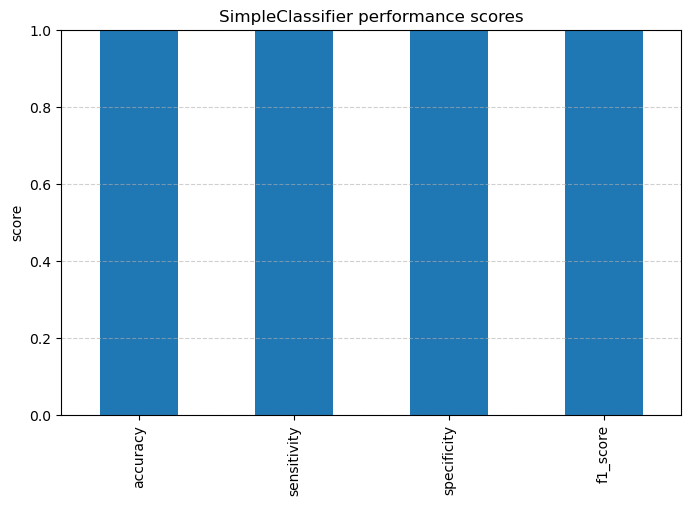

In [26]:
scores.plot(kind='bar', figsize=(8,5))
plt.ylabel('score')
plt.title('SimpleClassifier performance scores')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://numpy.org/devdocs/index.html

https://pandas.pydata.org/docs/index.html
